# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/rajsingh/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


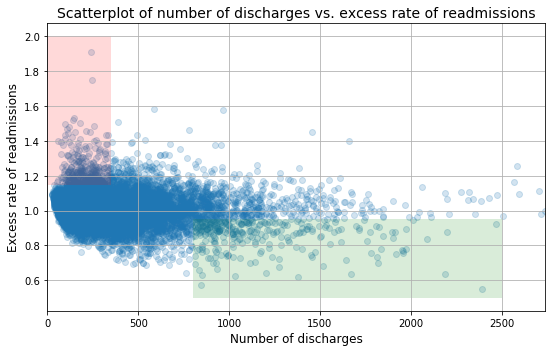

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

- Just from looking at the plot, I disagree that the rate of readmissions is trending downwards with increasing discharges. While there are a handful of hospitals that have high excess rates (shaded red) and a small amount of discharges, there are also many that have a small amount of discharges and lower excess rates. Moreover, although you can see blue dots in the area that is shaded green there are also many dots above that area, indicating that many hospitals that have a high amount of discharges also have high excess rates. 
- The conclusion that there is a significant correlation between discharges and readmission rates is incorrect, that has not been clearly established from the statistics provided in the report. Furthermore, the conclusion that smaller hospitals lack resources, so they have a higher rate of readmission is incorrect. We don't know for sure that smaller hospitals necessarily have a smaller amount of discharges.
- In the recommendations section, the hospital is using capacity, rather than number of discharges, to determine whether or not the hospital has an excess readmission rate. Also, as stated before, there has not been an established correlation between number of discharges and excess readmission.

Let's set up a null hypothesis and an alternate hypothesis.
- Null hypothesis: There is a no significant difference between the mean excess readmission rate of hospitals with less than 500 discharges and those with greater than or equal to 500 discharges.
- Alternate hypothesis: The mean excess readmission rate for hospitals with less than 500 discharges is significantly greater than that of the hospitals with greater than or equal to 500 discharges.

We will use a frequentist approach to test this hypothesis at the alpha = 0.01 level.

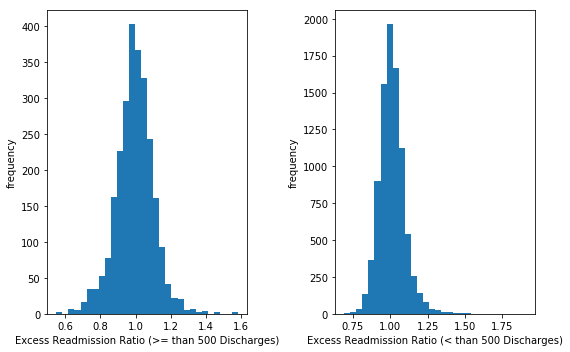

In [5]:
# first, we need to separate hospitals based on their number of discharges.

clean_hospital_read_df_more500 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>=500]
clean_hospital_read_df_less500 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<500]

# now, we need to check normality of distributions and sample size.
fig, axes = plt.subplots(1,2,figsize=(8,5))
axes[0].hist(x=clean_hospital_read_df_more500['Excess Readmission Ratio'], bins=30)
axes[0].set_xlabel('Excess Readmission Ratio (>= than 500 Discharges)')
axes[0].set_ylabel('frequency')
axes[1].hist(x=clean_hospital_read_df_less500['Excess Readmission Ratio'].dropna(), bins=30)
axes[1].set_xlabel('Excess Readmission Ratio (< than 500 Discharges)')
axes[1].set_ylabel('frequency')
plt.tight_layout()
plt.show()


Both distributions appear to be approximately normal and the sample sizes are adequately large. The excess readmission ratios of hospitals are independent of each other (the readmission rate of one hospital is does not affect that of another hospital). Therefore, the CLT applies, and we can use a z-test.

In [6]:
# now we compute the z-statistic
less500_mean = np.mean(clean_hospital_read_df_less500['Excess Readmission Ratio'])
more500_mean = np.mean(clean_hospital_read_df_more500['Excess Readmission Ratio'])

difference = less500_mean - more500_mean
less500_var = np.var(clean_hospital_read_df_less500['Excess Readmission Ratio'])/len(clean_hospital_read_df_less500)
more500_var = np.var(clean_hospital_read_df_more500['Excess Readmission Ratio'])/len(clean_hospital_read_df_more500)

standard_error = np.sqrt(less500_var + more500_var)
z_score = difference/standard_error
import scipy.stats as st
p_value = 1 - st.norm.cdf(z_score)
print('The p-value is ' + `p_value`)

The p-value is 1.567190821560871e-12


Since our p-value is less than 0.01, we reject the null hypothesis. Our result is statistically significant.

There is some practical significance to our analysis here. Certainly, hospitals that have less than 500 discharges have a statistically significant difference than that of hospitals with greater than or equal to 500 discharges. Now, this does not necessarily mean that the problem relates to capacity of the hospitals. I would recommend that the client investigate what is leading to the smaller amount of discharges, because there certainly appears to be a correlation. 

It is hard to determine from the scatterplot what is going on because there are so many large dots that clump together so it is hard to tell how many there actually are in a particular area. The shaded areas don't do much to delineate any patterns because it only shows clusters; similar clusters can be seen in other parts of the scatterplot so it isn't clear that these shaded areas indicate a pattern.

It may be helpful to draw a regression line in the scatterplot to show correlation between the two variables:

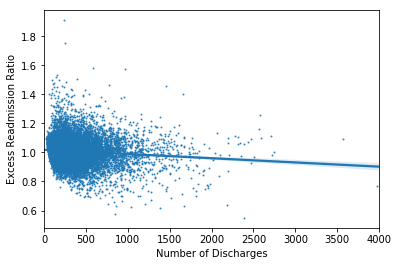

In [7]:
import seaborn as sns
sns.regplot(data=clean_hospital_read_df,x='Number of Discharges',y='Excess Readmission Ratio',marker='o',
           scatter_kws={'s':1})
plt.xlim(0,4000)
plt.show()